In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [4]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
 # create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


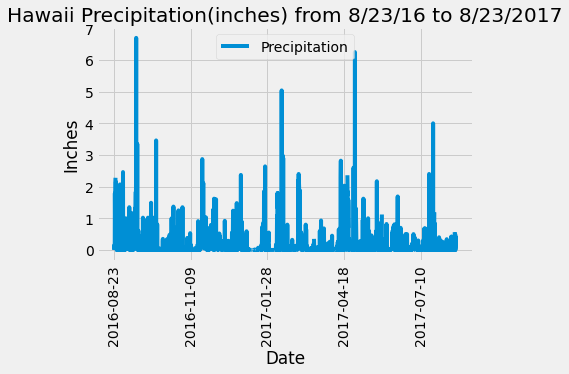

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
year_precip = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').order_by(measurement.date).all()
    
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(year_precip, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precip_df.set_index('Date', inplace=True )

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot=90, title = "Hawaii Precipitation(inches) from 8/23/16 to 8/23/2017")
plt.ylabel("Inches")
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.id).count()
print(total_stations)

9


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_min = session.query(measurement.station, func.min(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
most_active_max = session.query(measurement.station, func.max(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
most_active_avg = session.query(measurement.station, func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print(f'The lowest temperature is {most_active_min}, the hightest temperature is {most_active_max}, the average temperature is {most_active_avg}')

The lowest temperature is [('USC00519281', 54.0)], the hightest temperature is [('USC00519281', 85.0)], the average temperature is [('USC00519281', 71.66378066378067)]


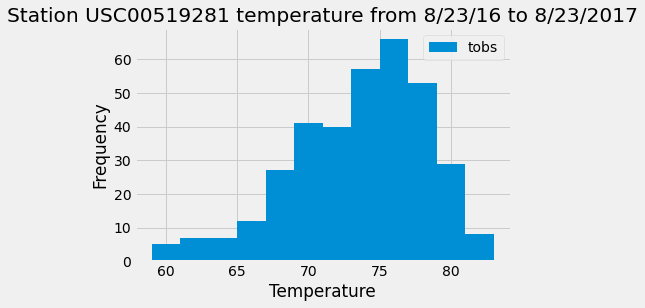

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation 
#--data for this station and plot the results as a histogram
most_active = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= '2016-08-23').all()

most_active_temps = pd.DataFrame(most_active, columns=['tobs'])
most_active_temps.plot.hist(bins=12, title="Station USC00519281 temperature from 8/23/16 to 8/23/2017")
plt.xlabel("Temperature")
plt.show()

# Close session

In [19]:
# Close Session
session.close()